Importing data form a csv below


In [70]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

Use open file to read the csv

In [71]:
filename = 'data/sitka_weather_2021_full.csv'
# filename = 'data/death_valley_2021_full.csv'

Printing the headers

In [72]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Get high temperatures from this file.
    for index, column in enumerate(header_row):
        print(index, column)

0 STATION
1 NAME
2 DATE
3 AWND
4 PGTM
5 PRCP
6 TAVG
7 TMAX
8 TMIN
9 WDF2
10 WDF5
11 WSF2
12 WSF5
13 WT01
14 WT02
15 WT04
16 WT05
17 WT08
18 WT09


Automating the Parsing of the Header Row

In [73]:
high_row = header_row.index('TMAX')
low_row = header_row.index('TMIN')
date_row = header_row.index('DATE')

Printing the highs and gettng the dates.
Adding the lows to the plot too.

In [74]:
with open(filename) as f:
    reader = csv.reader(f)
    dates, highs, lows = [], [], []
    
    for row in reader:
        try:
            highs.append(int(row[high_row]))
            lows.append(int(row[low_row]))
        except ValueError:
            continue
        
        current_date = datetime.strptime(row[date_row], '%Y-%m-%d')
        dates.append(current_date)

Plotting the data in a temperature chart and shade

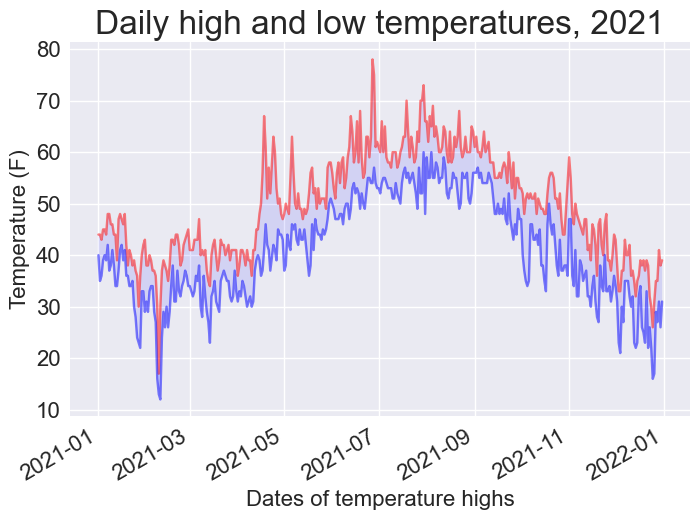

In [75]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format the plot
ax.set_title("Daily high and low temperatures, 2021", fontsize=24)
ax.set_xlabel('Dates of temperature highs', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()